                                                                ***LOADING DATASET AND PRE-PROCESSING***

In [10]:
#Essential libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Reading the dataset
data = pd.read_csv('BA_reviews.csv')  

# Pre-Processing functions
def preprocess_text(text):
    text = text.lower()
    #text = text.str.replace('ba', '')
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\W+', ' ', text)
    #text = re.sub(r'trip verified', '', text)  # Removing "trip verified" phrase
    #text = re.sub(r'not verified', '', text)   # Removing "not verified" phrase
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Applying Pre-Processing to the review column in the data
data['cleaned_review'] = data['review'].apply(preprocess_text)

In [12]:
#checking if the reviews were cleaned and printing the file
data['cleaned_review']
data.to_csv('BA_reviews_cleaned.csv',index=False)

                                                                   **TOPIC MODELLING AND DISPLAY OF TOPICS**

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

data['cleaned_review'] = data['cleaned_review'].str.replace('ba', '')
data['cleaned_review'] = data['cleaned_review'].str.replace('british airway', '')

vectorizer = CountVectorizer(max_features=1000, max_df=0.8)
X = vectorizer.fit_transform(data['cleaned_review'])

#Latent Dirichlet Allocation
num_topics = 20
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

#Top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print()

num_top_words = 15
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, num_top_words)

Topic 0:
seat economy premium leg room front food hour extra airline get service one passenger row

Topic 1:
year many staff child time one travel use avios travelling travelled family journey trip airline

Topic 2:
seat class business get food aisle cabin first window good one service sleep bed crew

Topic 3:
hour london day time airport delay would delayed arrived heathrow told due late luggage one

Topic 4:
club service class business europe money staff product airline passenger economy seat food premium poor

Topic 5:
told staff asked one would ck got said get airport another could day luggage time

Topic 6:
meal drink served breakfast food service crew choice offered chicken hour cabin snack dinner economy

Topic 7:
seat would time plane old crew ck cabin staff fly screen got didnt passenger entertainment

Topic 8:
boarding time seat drink lounge check crew checkin quick security service good minute full food

Topic 9:
plane hour water one food check drink bottle people queue retu

In [27]:
#topic assignment 
topic_assignments = lda.transform(X)
topic_assignments_df = pd.DataFrame(topic_assignments, columns=[f'Topic {i+1}' for i in range(num_topics)])
topic_assignments_df.to_csv('BA_reviews_topic_assignments.csv', index=False)

In [28]:
#topic words
topic_words = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
    topic_words.append(top_words)
    
#assigning it to a dataframe and printing the csv file
topic_words_df = pd.DataFrame(topic_words, columns=[f'Top Word {i+1}' for i in range(num_top_words)])
topic_words_df.to_csv('BA_reviews_topic_words.csv', index=False)

                                                                  **SENTIMENT ANALYSIS**

In [29]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

#Statement Analysis Function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

#Sentiment analysis on the cleaned_review column
data['sentiment'] = data['cleaned_review'].apply(analyze_sentiment)

#printing the sentiment analysis csv file
data.to_csv('BA_reviews_sentiment_analysis.csv',index=False)

In [30]:
from textblob import TextBlob
import pandas as pd

# Statement Analysis Function
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity
    return sentiment

# Load your data into a DataFrame (assuming you have a 'review' column)
data = pd.read_csv('BA_reviews_cleaned.csv')

# Sentiment analysis on the 'cleaned_review' column
data['sentiment_score'] = data['cleaned_review'].apply(analyze_sentiment)
data['sentiment'] = data['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

# Save the DataFrame with sentiment analysis to a CSV file
data.to_csv('BA_reviews_sentiment_analysis.csv', index=False)


In [31]:
#count of positive,negative and neutral sentiment
positive_count = (data['sentiment'] == 'Positive').sum()
negative_count = (data['sentiment'] == 'Negative').sum()
neutral_count = (data['sentiment'] == 'Neutral').sum()

print(f"Positive count: {positive_count}")
print(f"Negative count: {negative_count}")
print(f"Neutral count: {neutral_count}")

Positive count: 2561
Negative count: 1036
Neutral count: 24


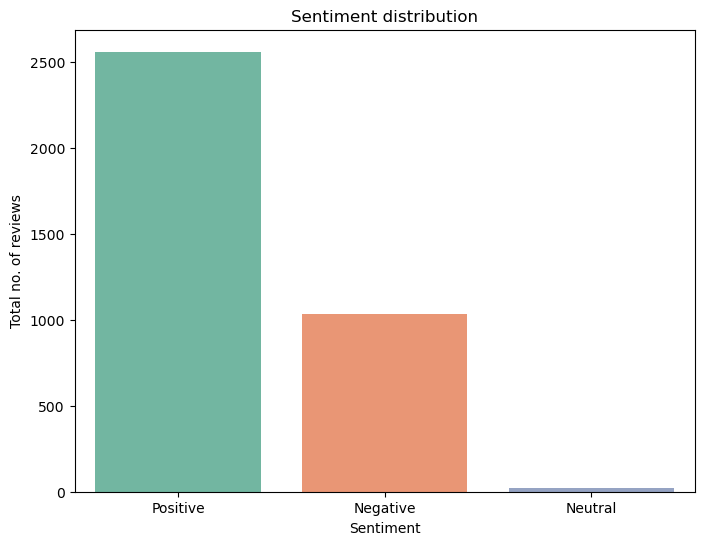

In [32]:
#Sentiment distribution Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data, palette='Set2')
plt.title('Sentiment distribution')
plt.xlabel('Sentiment')
plt.ylabel('Total no. of reviews')
plt.show()

                                                                **WORD CLOUD**

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for each sentiment
sentiments = ['Positive', 'Negative', 'Neutral']
for sentiment in sentiments:
    reviews = ' '.join(data[data['sentiment'] == sentiment]['cleaned_review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
    
    # Extract the words from the word cloud object
    words = list(wordcloud.words_.keys())

In [35]:
#saving the entire word cloud as a text file
reviews_filename = 'BA_reviews_wordcloud.txt'
with open(reviews_filename, 'w') as file:
    file.write(reviews)

print(f'Reviews saved to {reviews_filename}')

Reviews saved to BA_reviews_wordcloud.txt
